# Classifying Dog and Cat using CNN on Tensorflow 2.x

## Problem Statement

**Dataset:** The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat.
It was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification

## Tasks to be Performed

In this tutorial you will be performing the following tasks:

* Prepare the dataset for the model
* Install Tensorflow 2.x
* Develop convolutional neural network model for classifying the images or Dog Vs cat
* Plot the change in accuracy per epochs
* Evaluate the model on the testing data
* Analyse the model summary
* Add Dropout to prevent overfitting and check its effect on accuracy
* Increasing the number of Hidden Layers check its effect on accuracy
* Manipulate the batch_size and epochs and check its effect on accuracy


## Dataset Description

The Dog Vs Cat image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images

1. Class I = Dog
2. Class II= Cat


![alt text](https://imgur.com/d8Qd1hD.gif)


# Skills Gained

TensorFlow 2.x

* Convolutional neural network implementation
* Model Improvisation
* Model Save
* Load the pretrained model

## Pre-process the Dataset

### Download the Dataset

**Dataset** https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, MaxPooling2D, Dropout, Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimage

## Initialize the parameters

In [2]:
img_width, img_height = 150,150
train_data_dir = './images/pet classification/training_set'
validation_data_dir = './images/pet classification/test_set'
nb_train_samples = 100
nb_validation_samples = 100
epochs = 20
batch_size = 20

## Loading the Dataset

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size= (img_height, img_width),
                                                    batch_size=batch_size, class_mode='binary', classes=['cats','dogs'])

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width),
                                                       batch_size=batch_size, class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## Visual Representation of ImageDataGenerator

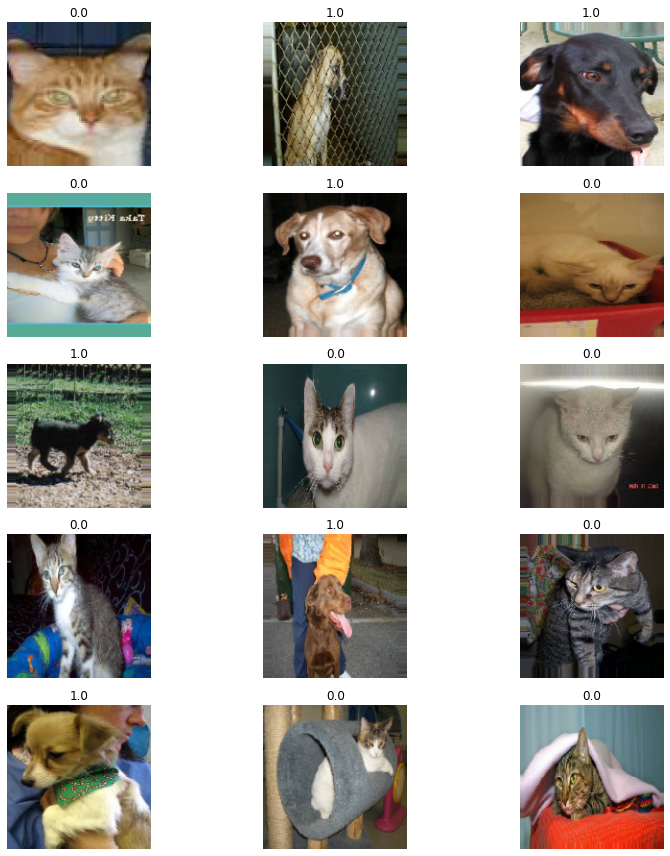

In [4]:
plt.figure(figsize=(12, 12))
for i in range(0,15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        img = X_batch[0]
        plt.imshow(img)
        plt.title(Y_batch[0])
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

## Designing the Model

### Build the basic CNN model 0

#### Layers in CNN:

1. Conlutional Layer
2. ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)

![alt text](https://i.imgur.com/P4yvxRW.png)

![alt text](https://i.imgur.com/a2vSxQW.png)

* Adding convolutional neural network in the model
* add() - Helps to add layers in the model
* Conv2D() - Convolutional layer (to extract features from the images)
* Conv2D(32,(3,3),input_shape=input_shape)
    * 32 - Take 32 features from the given image
    * (3,3) - Metrics size of the images(3*3)
    * input_shape = image size
* Activation function (relu) is added to remove the negative values

In [5]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(img_width, img_height, 3))) # 64 neurons with 3*3 filter
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling2d helps to reduce the size of data
model.add(Flatten()) # Converts multi dimensional array to 1D channel
model.add(Dense(64)) #64 neurons with 3*3 filter
# Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [6]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

### Fit the basic CNN model

In [7]:
training = model.fit_generator(train_generator, steps_per_epoch=nb_train_samples, epochs=epochs,
                               validation_data=validation_generator, validation_steps=nb_validation_samples)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 230s 2s/step - loss: 2.2015 - accuracy: 0.5430 - val_loss: 0.6550 - val_accuracy: 0.6465
Epoch 2/20
100/100 [==============================] - 134s 1s/step - loss: 0.6787 - accuracy: 0.5970 - val_loss: 0.6605 - val_accuracy: 0.6130
Epoch 3/20
100/100 [==============================] - 98s 982ms/step - loss: 0.6810 - accuracy: 0.6242 - val_loss: 0.6398 - val_accuracy: 0.6600
Epoch 4/20
100/100 [==============================] - 82s 822ms/step - loss: 0.6595 - accuracy: 0.6554 - val_loss: 0.6350 - val_accuracy: 0.6645
Epoch 5/20
100/100 [==============================] - 67s 670ms/step - loss: 0.6347 - accuracy: 0.6615 - val_loss: 0.6091 - val_accuracy: 0.6900
Epoch 6/20
100/100 [==============================] - 58s 578ms/step - loss: 0.6373 - accuracy: 0.6700 - val_loss: 0.6090 - val_accuracy: 0.6785
Epoch 7/20
100/100 [==============================] - 52s 

### Find the accuracy score

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


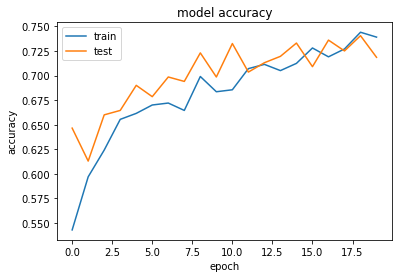

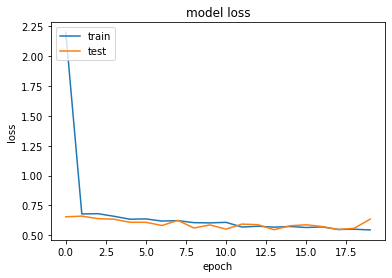

In [8]:
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Predict the image

Prediction Cat


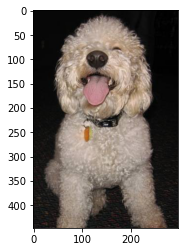

In [9]:
import numpy as np

img_pred = image.load_img('./images/pet classification/test_set/dogs/dog.4003.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rstl = model.predict(img_pred)

if rstl[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print('Prediction', prediction)

img = mpimage.imread('./images/pet classification/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

Prediction Dog


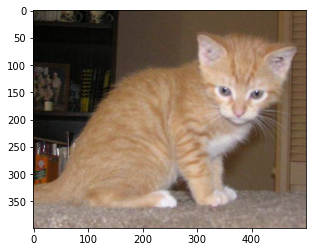

In [10]:
import numpy as np

img_pred = image.load_img('./images/pet classification/test_set/cats/cat.4003.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rstl = model.predict(img_pred)

if rstl[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print('Prediction', prediction)

img = mpimage.imread('./images/pet classification/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

## Build the basic CNN model 1

### Let's add add some layers to prevent ovetfitting

**Dropout:** used to deactive some neurons randomly to prevent overfitting.

**Early Stop:** To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased.

**Learning Rate Reduction:** We will reduce the learning rate when then accuracy not increase for 2 steps.

* monitor: quantity to be monitored.
* factor: factor by which the learning rate will be reduced. new_lr = lr * factor
* patience: number of epochs with no improvement after which learning rate will be reduced.
* verbose: int. 0: quiet, 1: update messages.
* mode: one of {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
* min_delta: threshold for measuring the new optimum, to only focus on significant changes.
* cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
* min_lr: lower bound on the learning rate.

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,factor=0.5,min_lr=1e-5,verbose=1)
callbacks = [earlystop, learning_rate_reduction]

In [12]:
model1 = Sequential()
model1.add(Conv2D(64, (3,3), input_shape=(img_height, img_width, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_3 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                22429760  
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)               

In [13]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
training = model1.fit_generator(train_generator, validation_data=validation_generator, epochs=epochs,
                                steps_per_epoch=nb_train_samples, validation_steps=nb_validation_samples,
                                callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 40s 401ms/step - loss: 1.3443 - accuracy: 0.5225 - val_loss: 0.6900 - val_accuracy: 0.5195
Epoch 2/20
100/100 [==============================] - 40s 397ms/step - loss: 0.6820 - accuracy: 0.5465 - val_loss: 0.6639 - val_accuracy: 0.5925
Epoch 3/20
100/100 [==============================] - 38s 382ms/step - loss: 0.6744 - accuracy: 0.5910 - val_loss: 0.6625 - val_accuracy: 0.6310
Epoch 4/20
100/100 [==============================] - 37s 367ms/step - loss: 0.6753 - accuracy: 0.5640 - val_loss: 0.6706 - val_accuracy: 0.5510
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 0.6619 - accuracy: 0.5895
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 [==============================] - 37s 372ms/step - loss: 0.6619 - accuracy: 0.5895 - val_loss: 0.6345 - val_accuracy: 0.6215
Epoch 6/20
100/100 [==============================] - 37s 369ms/step - loss: 0.6480 - accuracy: 0.6165 - val_l

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


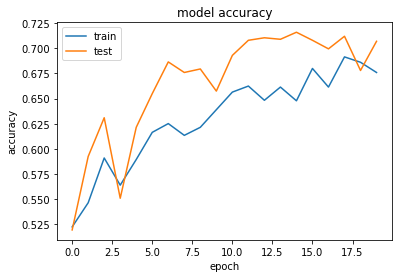

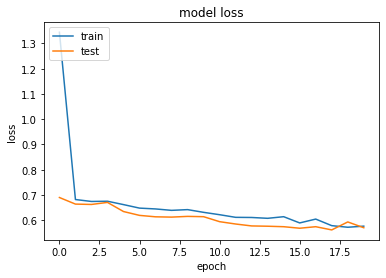

In [15]:
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Predict the image

Prediction Dog


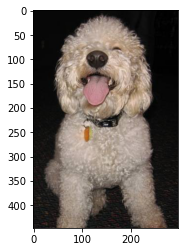

In [16]:
import numpy as np

img_pred = image.load_img('./images/pet classification/test_set/dogs/dog.4003.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rstl = model1.predict(img_pred)

if rstl[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print('Prediction', prediction)

img = mpimage.imread('./images/pet classification/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

Prediction Dog


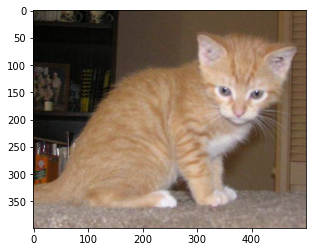

In [17]:
import numpy as np

img_pred = image.load_img('./images/pet classification/test_set/cats/cat.4003.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rstl = model1.predict(img_pred)

if rstl[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print('Prediction', prediction)

img = mpimage.imread('./images/pet classification/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

## Build the basic CNN model 2

![alt text](https://i.imgur.com/wpLHgqN.jpg)

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,factor=0.5,min_lr=1e-5,verbose=1)
callbacks = [earlystop, learning_rate_reduction]

In [19]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), input_shape=(img_height, img_width, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation="softmax"))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)       

### Fit the basic CNN model2

In [20]:
training = model2.fit_generator(train_generator, steps_per_epoch=nb_train_samples, validation_data=validation_generator,
                               epochs=epochs, validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 118s 1s/step - loss: 7.6592 - accuracy: 0.4977 - val_loss: 7.6170 - val_accuracy: 0.5005
Epoch 2/20
100/100 [==============================] - 114s 1s/step - loss: 7.5560 - accuracy: 0.5045 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/20
100/100 [==============================] - 117s 1s/step - loss: 7.5941 - accuracy: 0.5020 - val_loss: 7.5712 - val_accuracy: 0.5035
Epoch 4/20
100/100 [==============================] - 117s 1s/step - loss: 7.5789 - accuracy: 0.5030 - val_loss: 7.6094 - val_accuracy: 0.5010
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 7.7314 - accuracy: 0.4930
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 [==============================] - 116s 1s/step - loss: 7.7314 - accuracy: 0.4930 - val_loss: 7.6094 - val_accuracy: 0.5010
Epoch 6/20
100/100 [==============================] - 123s 1s/step - loss: 7.4340 - accuracy: 0.5125 - val_loss: 7.5941 

### Find the accuracy score

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


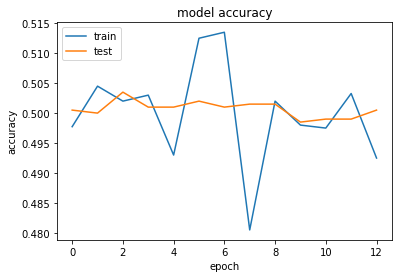

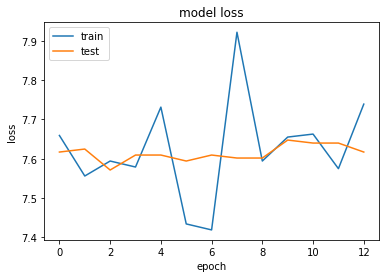

In [21]:
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Predict the image

Prediction Dog


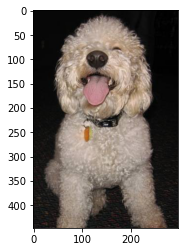

In [22]:
import numpy as np

img_pred = image.load_img('./images/pet classification/test_set/dogs/dog.4003.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rstl = model2.predict(img_pred)

if rstl[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print('Prediction', prediction)

img = mpimage.imread('./images/pet classification/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

Prediction Dog


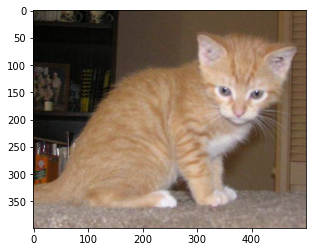

In [23]:
import numpy as np

img_pred = image.load_img('./images/pet classification/test_set/cats/cat.4003.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rstl = model2.predict(img_pred)

if rstl[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print('Prediction', prediction)

img = mpimage.imread('./images/pet classification/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

## Freeze the model

In [24]:
import json
from keras.models import model_from_json, load_model
from keras.preprocessing import image

import numpy as np

# Serialize model to json
model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
    
model2.save_weights('pet_classification.h5')

## Load the Saved Model

In [25]:
# Load json to create the model

json_file = open("model2.json","r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("pet_classification.h5")

### Predict the image

Prediction Dog


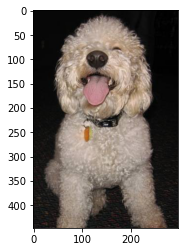

In [26]:
import numpy as np

img_pred = image.load_img('./images/pet classification/test_set/dogs/dog.4003.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rstl = loaded_model.predict(img_pred)

if rstl[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print('Prediction', prediction)

img = mpimage.imread('./images/pet classification/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

## Build CNN model 3 using VGG16 pretrained model

![alt text](https://i.imgur.com/EyeXqiB.png)

In [29]:
from keras.models import Sequential
from keras.layers import GlobalMaxPooling2D, Dense
from keras.applications import VGG16
from keras.models import Model

input_shape = (150, 150, 3)
epochs = 20
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:15]:
    layer.trainable = False
    
for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden unit and relu activation
x = Dense(512, activation="relu")(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, x)

In [30]:
from keras import optimizers
model3.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])

model3.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [32]:
training = model3.fit_generator(train_generator, steps_per_epoch=nb_train_samples, epochs=epochs,
                               validation_data=validation_generator,validation_steps=nb_validation_samples,
                                callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 296s 3s/step - loss: 0.6931 - accuracy: 0.6035 - val_loss: 0.5195 - val_accuracy: 0.8035
Epoch 2/20
100/100 [==============================] - 290s 3s/step - loss: 0.5417 - accuracy: 0.7189 - val_loss: 0.3895 - val_accuracy: 0.8620
Epoch 3/20
100/100 [==============================] - 273s 3s/step - loss: 0.4186 - accuracy: 0.8085 - val_loss: 0.3134 - val_accuracy: 0.8770
Epoch 4/20
100/100 [==============================] - 270s 3s/step - loss: 0.3532 - accuracy: 0.8400 - val_loss: 0.2756 - val_accuracy: 0.8825
Epoch 5/20
100/100 [==============================] - 273s 3s/step - loss: 0.3240 - accuracy: 0.8630 - val_loss: 0.2514 - val_accuracy: 0.8905
Epoch 6/20
100/100 [==============================] - 276s 3s/step - loss: 0.2830 - accuracy: 0.8770 - val_loss: 0.2376 - val_accuracy: 0.8970
Epoch 7/20
100/100 [==============================] - 288s 3s/step - loss: 0.2515 - accuracy: 0.8960 - val_loss: 0.2296 - val_accuracy: 0.9065

## Find the Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


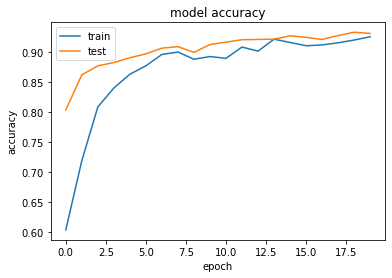

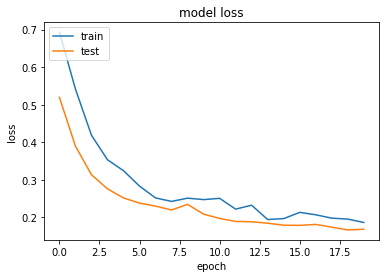

In [33]:
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Predicting the image

Prediction Dog


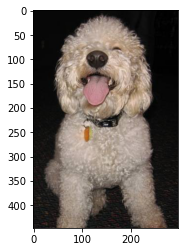

In [37]:
import numpy as np

img_pred = image.load_img('./images/pet classification/test_set/dogs/dog.4003.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rstl = model3.predict(img_pred)

if rstl[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print('Prediction', prediction)

img = mpimage.imread('./images/pet classification/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

Prediction Cat


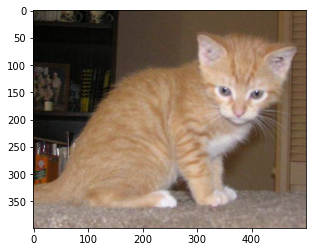

In [38]:
import numpy as np

img_pred = image.load_img('./images/pet classification/test_set/cats/cat.4003.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rstl = model3.predict(img_pred)

if rstl[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print('Prediction', prediction)

img = mpimage.imread('./images/pet classification/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
